In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x578d4000 @  0x7f06ca2de2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [3]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-26 04:04:15--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-12-26 04:04:15 (51.1 MB/s) - ‘helper.py’ saved [2813/2813]



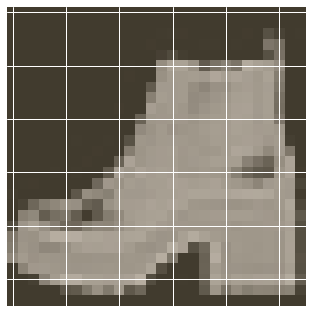

In [23]:
import helper
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

In [24]:
print(labels)

tensor([9, 1, 5, 7, 6, 8, 0, 2, 3, 1, 3, 6, 0, 5, 9, 1, 7, 2, 4, 5, 8, 0, 5, 4,
        9, 4, 8, 4, 3, 9, 0, 8, 9, 7, 1, 2, 0, 9, 8, 7, 4, 8, 5, 6, 4, 3, 4, 0,
        5, 7, 1, 2, 3, 9, 5, 0, 9, 6, 4, 6, 0, 4, 4, 2])


In [26]:
print(images.shape)

torch.Size([64, 1, 28, 28])


In [0]:
from torch import nn
import torch.nn.functional as F
from torch import optim



In [27]:
#using one hidden layer of 256 neurons

model = nn.Sequential(nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10),nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.003)

epochs = 5

for e in range(epochs):
  running_loss = 0
  for images , labels in trainloader:
    optimizer.zero_grad()
  
    images = images.flatten(start_dim=1)
  
    output = model(images)
  
    loss = criterion(output,labels)
  
    loss.backward()
  
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")
    
  
  
  
  

Training loss: 1.124776228468047
Training loss: 0.6745369494406145
Training loss: 0.5917439370203629
Training loss: 0.5476047661639988
Training loss: 0.5191761375998637


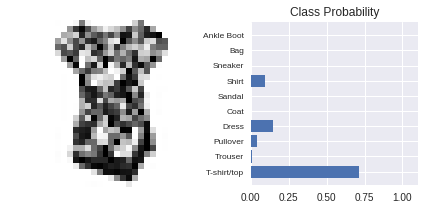

In [45]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')